## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error


boston = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")

X = boston.drop('medv', axis=1).copy()
y = boston['medv'].copy()

boston.shape

(506, 14)

In [2]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [3]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

##### Divido em treino e teste (70% x 30%)

In [4]:
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.7)

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [5]:
arvore_reg = DecisionTreeRegressor(max_depth=2)

modelo = arvore_reg.fit(x_treino, y_treino)

print(modelo.score(x_treino, y_treino))
print(modelo.score(x_teste, y_teste))

0.7308680636861327
0.6062857050387525


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [6]:
path = arvore_reg.cost_complexity_pruning_path(x_treino, y_treino)

ccp_alphas = path.ccp_alphas

#ccp_alphas

### 3. Para cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [7]:
modelos = []

for ccp in ccp_alphas:
    
    modelo = DecisionTreeRegressor(ccp_alpha = ccp)
    modelos.append( modelo.fit(x_treino, y_treino) )

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [8]:
lista_MSE_treino = []

for modelo in modelos:
    
    erro_media_quad = mean_squared_error(y_treino, modelo.predict(x_treino))
    
    lista_MSE_treino.append(erro_media_quad)

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

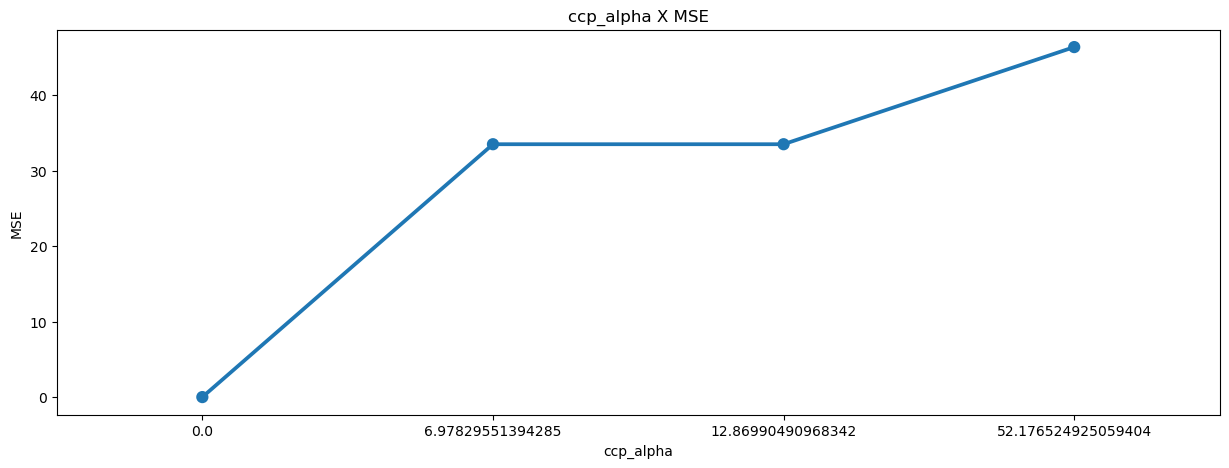

In [9]:
plt.figure(figsize=[15,5])

ax = sns.pointplot(x = ccp_alphas, y = lista_MSE_treino)

ax.set_title("ccp_alpha X MSE")
ax.set_xlabel("ccp_alpha")
ax.set_ylabel("MSE")

plt.show()

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [10]:
arvore = DecisionTreeRegressor(ccp_alpha=0)

modelo = arvore.fit(x_treino, y_treino)

modelo.score(x_treino, y_treino)

1.0

### 7. Visualize esta árvore.

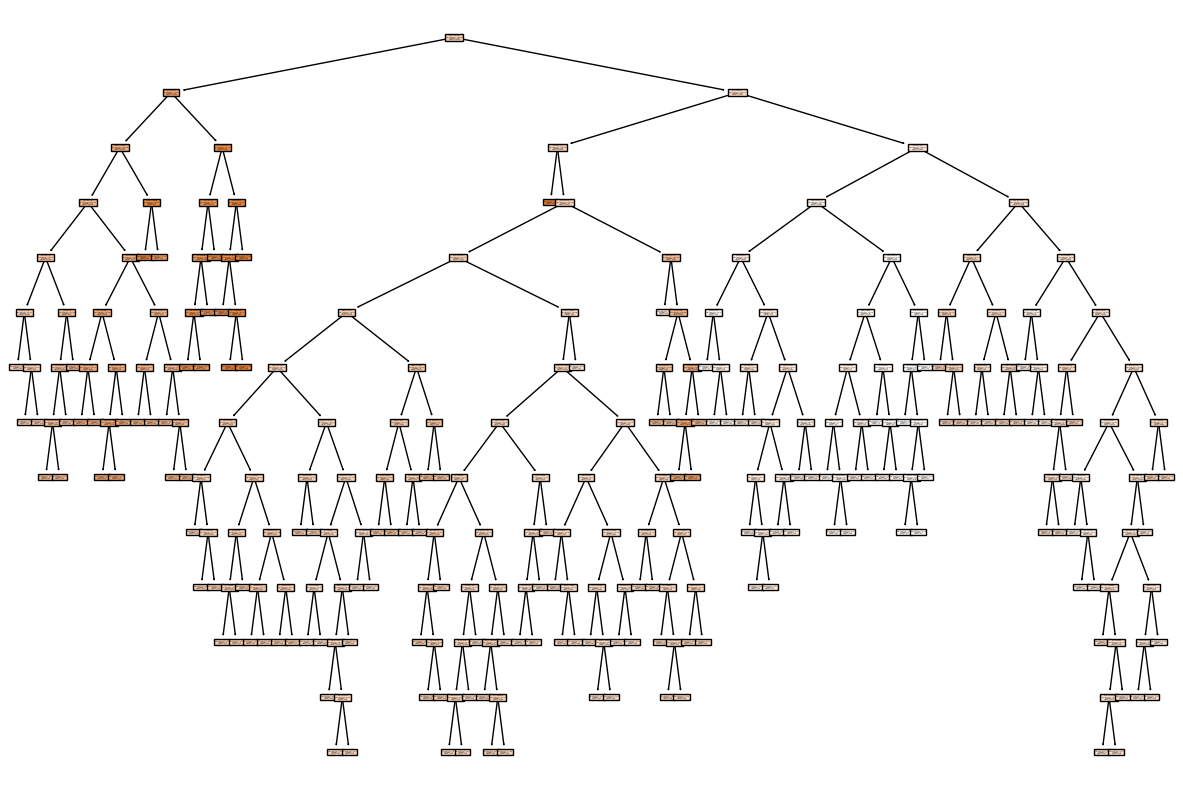

In [11]:
plt.figure(figsize=[15,10])

tree.plot_tree(decision_tree = modelo, 
               feature_names=boston.columns,
               filled=True)

plt.show()